In [87]:
import numpy as np
import pandas as pd
from scipy.signal import butter, filtfilt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt
from nptdms import TdmsFile
from itertools import groupby
from operator import itemgetter

In [88]:
# 1. EMG 데이터 로드 및 전처리
emg_data = pd.read_csv('../../data/250602_leejw.csv', skiprows=6)
signal_raw = pd.to_numeric(emg_data.iloc[:, 0], errors='coerce').dropna().values
Fs_emg = 2148.1481
t_emg = np.arange(len(signal_raw)) / Fs_emg

# 2. Load TDMS and extract Trajectory
tdms = TdmsFile.read('../../data/250602_leejw.tdms')
group = 'emg_Datas' if 'emg_Datas' in tdms.groups() else list(tdms.groups())[0].name
traj = tdms[group]['Trajectory'][:]
Fs_tdms = 50  # TDMS sampling rate (Hz)
t_tdms = np.arange(len(traj)) / Fs_tdms

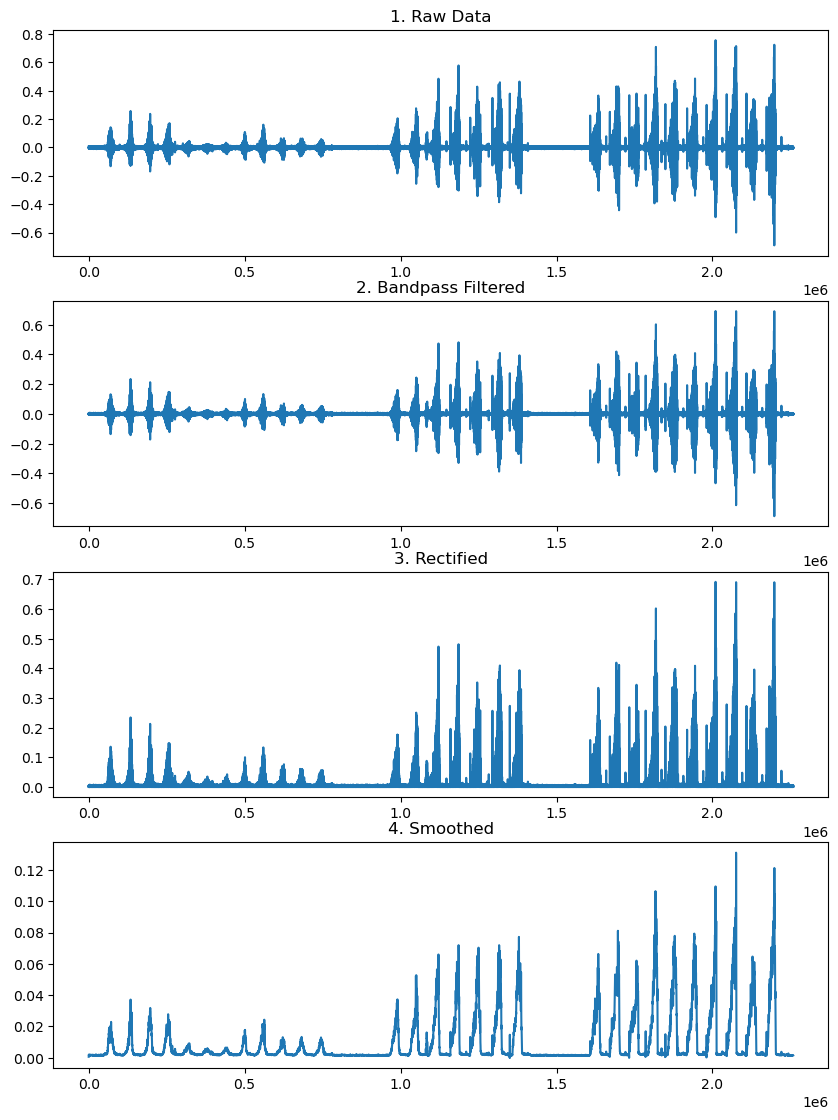

In [120]:
import pandas as pd
import numpy as np
from scipy.signal import butter, filtfilt
import matplotlib.pyplot as plt

# 1. CSV 파일 불러오기 (숫자 데이터만)
# data = pd.read_csv('Trial_1.csv', skiprows=6)  # 'EMG 1 (mV)' 다음 줄부터 데이터

# 2. 첫 컬럼만 추출 (예: EMG 1만 존재한다고 가정)
signal_raw = pd.to_numeric(emg_data.iloc[:, 0], errors='coerce').dropna().values

# 3. 샘플링 주파수
Fs = 2148.1481

# 4. 필터 함수 정의
def butter_bandpass(lowcut, highcut, fs, order=4):
    nyq = 0.5 * fs
    low, high = lowcut / nyq, highcut / nyq
    return butter(order, [low, high], btype='band')

def butter_lowpass(cutoff, fs, order=4):
    nyq = 0.5 * fs
    norm_cutoff = min(cutoff / nyq, 0.99)
    return butter(order, norm_cutoff, btype='low')

# 5. Bandpass Filter (40–450Hz)
b_bpf, a_bpf = butter_bandpass(40, 450, Fs)
signal_filtered = filtfilt(b_bpf, a_bpf, signal_raw)

# 6. Rectification
signal_rectified = np.abs(signal_filtered)

# 7. Low-pass Filter (3Hz)
b_lpf, a_lpf = butter_lowpass(3, Fs)
signal_smoothed = filtfilt(b_lpf, a_lpf, signal_rectified)

# 8. Plotting
plt.figure(figsize=(10, 17))

plt.subplot(5, 1, 1)
plt.plot(signal_raw)
plt.title("1. Raw Data")

plt.subplot(5, 1, 2)
plt.plot(signal_filtered)
plt.title("2. Bandpass Filtered")

plt.subplot(5, 1, 3)
plt.plot(signal_rectified)
plt.title("3. Rectified")

plt.subplot(5, 1, 4)
plt.plot(signal_smoothed)
plt.title("4. Smoothed")

plt.show()


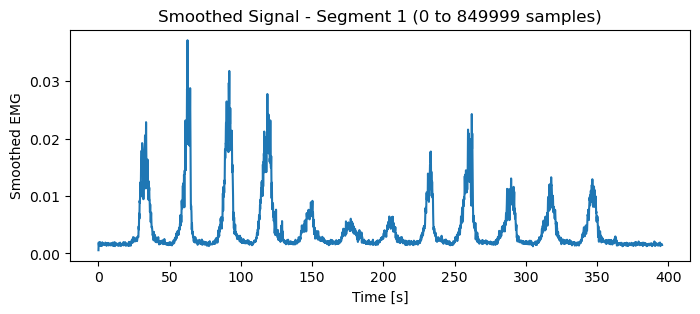

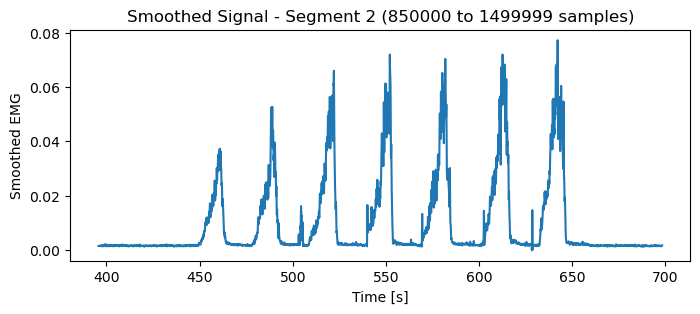

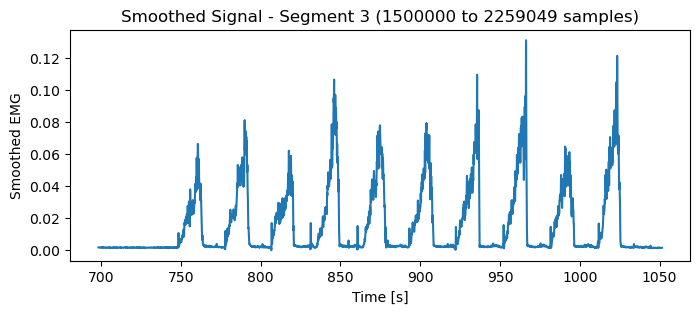

In [121]:
# 2. 시간(time) 벡터 생성 (인덱스를 초 단위로 바꾸기)
time = np.arange(len(signal_smoothed)) / Fs  # 길이가 signal_smoothed와 동일

# 3. 구간을 나눌 기준 인덱스 (샘플 단위)
#    예: split_times = [400, 700]라면, 0~399, 400~699, 700~끝 으로 3개 구간
split_times = [ int(0.85*1e6),  int(1.5*1e6)] 

# 4. 구간별로 따로 플롯 그리기
for group_idx in range(len(split_times) + 1):
    if group_idx == 0:
        start_idx = 0
    else:
        start_idx = split_times[group_idx - 1]
    if group_idx < len(split_times):
        end_idx = split_times[group_idx]
    else:
        end_idx = len(time)  # 마지막 구간은 전체 끝까지

    # 해당 구간의 시간/신호 슬라이스
    t_seg = time[start_idx:end_idx]
    y_seg = signal_smoothed[start_idx:end_idx]

    # 새 Figure 혹은 서브플롯으로 그려도 되지만, 간단히 개별 창으로 그리기
    plt.figure(figsize=(8, 3))
    plt.plot(t_seg, y_seg)
    plt.xlabel("Time [s]")
    plt.ylabel("Smoothed EMG")
    plt.title(f"Smoothed Signal - Segment {group_idx+1} "
              f"({start_idx} to {end_idx-1} samples)")
    # plt.tight_layout()

plt.show()

In [91]:
import pandas as pd
import numpy as np
from scipy.signal import butter, filtfilt
import matplotlib.pyplot as plt

# 1. CSV 파일 불러오기 (숫자 데이터만)
data = pd.read_csv('emg2.csv', skiprows=6)  # 'EMG 1 (mV)' 다음 줄부터 데이터

# 2. 첫 컬럼만 추출 (예: EMG 1만 존재한다고 가정)
signal_raw = pd.to_numeric(data.iloc[:, 0], errors='coerce').dropna().values

# 3. 샘플링 주파수
Fs = 2148.1481

# 4. 필터 함수 정의
def butter_bandpass(lowcut, highcut, fs, order=4):
    nyq = 0.5 * fs
    low, high = lowcut / nyq, highcut / nyq
    return butter(order, [low, high], btype='band')

def butter_lowpass(cutoff, fs, order=4):
    nyq = 0.5 * fs
    norm_cutoff = min(cutoff / nyq, 0.99)
    return butter(order, norm_cutoff, btype='low')

# 5. Bandpass Filter (40–450Hz)
b_bpf, a_bpf = butter_bandpass(40, 450, Fs)
signal_filtered = filtfilt(b_bpf, a_bpf, signal_raw)

# 6. Rectification
signal_rectified = np.abs(signal_filtered)

# 7. Low-pass Filter (3Hz)
b_lpf, a_lpf = butter_lowpass(3, Fs)
signal_smoothed = filtfilt(b_lpf, a_lpf, signal_rectified)

# 8. Plotting
plt.figure(figsize=(10, 12))

plt.subplot(5, 1, 1)
plt.plot(signal_raw)
plt.title("1. Raw Data")

plt.subplot(5, 1, 2)
plt.plot(signal_filtered)
plt.title("2. Bandpass Filtered")

plt.subplot(5, 1, 3)
plt.plot(signal_rectified)
plt.title("3. Rectified")

plt.subplot(5, 1, 4)
plt.plot(signal_smoothed)
plt.title("4. Smoothed")

plt.tight_layout()
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'emg2.csv'

✅ Available groups and channels:
 - Group: Datas
    • Time (ms)
    • Reference Position X
    • Reference Position Y
    • Measured Position X
    • Measured Position Y
    • Reference Tension L
    • Reference Tension R
    • Reference Tension T
    • Measured Tension L
    • Measured Tension R
    • Measured Tension T
    • RBF1
    • RBF2
    • RBF3
    • RBF4
    • RBF5
    • Trajectory
    • Projected Force
    • Force X
    • Force Y
    • Damp1
    • Damp2
    • Damp3
    • Damp4
    • Damp5
    • Manual Trigger


C:\Users\awear\AppData\Local\Temp\ipykernel_2136\126678964.py:54: UserWarning: Glyph 46041 (\N{HANGUL SYLLABLE DONG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\awear\AppData\Local\Temp\ipykernel_2136\126678964.py:54: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\awear\AppData\Local\Temp\ipykernel_2136\126678964.py:54: UserWarning: Glyph 54868 (\N{HANGUL SYLLABLE HWA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\awear\AppData\Local\Temp\ipykernel_2136\126678964.py:54: UserWarning: Glyph 47560 (\N{HANGUL SYLLABLE MA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\awear\AppData\Local\Temp\ipykernel_2136\126678964.py:54: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\awear\AppData\Local\Temp\ipykernel_2136\126678964.py:54: UserWarning: Glyph 53433 (\N{HANGUL SYLLABLE KING}) missing from font(s) De

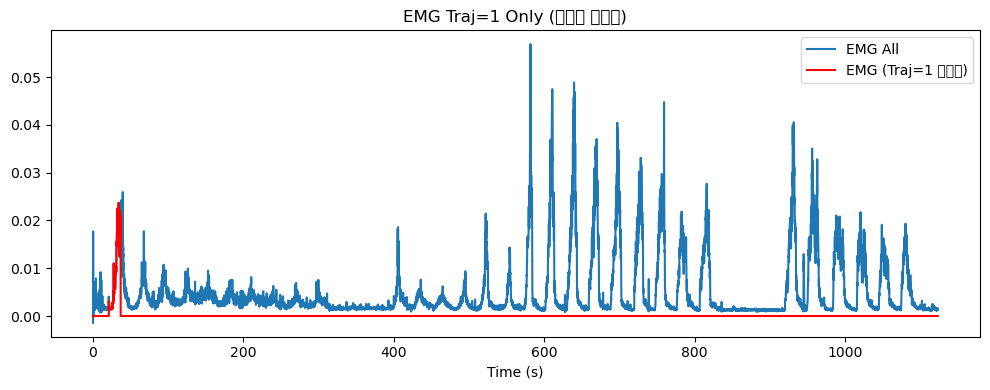

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from nptdms import TdmsFile

# # file_path = '../data/250516_01.tdms'
# # file_path = '../data/250516_05.tdms'
# file_path = '../../data/250602_leejw.tdms' 
# split_times = [400, 700]
file_path = '../../data/250602_jeongsh.tdms'
split_times = [350, 750]
tdms = TdmsFile.read(file_path)

print("✅ Available groups and channels:")
group_channel_map = {}
for grp in tdms.groups():
    name = grp.name
    channels = [ch.name for ch in grp.channels()]
    group_channel_map[name] = channels
    print(f" - Group: {name}")
    for ch in channels:
        print(f"    • {ch}")
        

# 3. Traj=1 구간 마스킹
mask = (traj == 1)

# 4. 시간축 기반으로 Traj=1 구간의 시작과 끝 인덱스 탐색
from itertools import groupby
from operator import itemgetter
traj_idxs = np.where(mask)[0]
if len(traj_idxs) > 0:
    # 여러 구간이 있을 경우 첫 구간만 예시로 사용
    ranges = []
    for k, g in groupby(enumerate(traj_idxs), lambda x: x[0] - x[1]):
        group_idx = list(map(itemgetter(1), g))
        ranges.append((group_idx[0], group_idx[-1]))
    start_idx, end_idx = ranges[0]   # 예: 첫 Traj=1 구간만 사용

    # 5. Traj=1 구간의 시간 범위 구하기
    start_time = t_tdms[start_idx]
    end_time = t_tdms[end_idx]

    # 6. EMG에서 동일 시간 범위에 해당하는 인덱스 구하기
    emg_mask = (t_emg >= start_time) & (t_emg <= end_time)
    emg_in_traj = np.where(emg_mask, signal_smoothed, 0)  # 혹은 np.nan

    # 7. 시각화 예시
    plt.figure(figsize=(10,4))
    plt.plot(t_emg, signal_smoothed, label='EMG All')
    plt.plot(t_emg, emg_in_traj, 'r', label='EMG (Traj=1 구간만)')
    plt.legend()
    plt.xlabel('Time (s)')
    plt.title('EMG Traj=1 Only (동기화 마스킹)')
    plt.tight_layout()
    plt.show()
else:
    print("Traj=1 구간이 없음")

In [ ]:
import numpy as np
import pandas as pd
from scipy.signal import hilbert

env = signal_smoothed                # 4단계 결과
t = np.arange(len(env)) / Fs         # 시간축 (초)

# 1. 기준선·임계값 잡기 (baseline 0.5초)
baseline = env[:int(0.5*Fs)]
th = baseline.mean() + 3*baseline.std()

# 2. 활성 구간(on/off) 찾기
active = env > th
changes = np.diff(active.astype(int))
onsets  = np.where(changes ==  1)[0]
offsets = np.where(changes == -1)[0]

# 3. 수축별 Feature
features = []
for on, off in zip(onsets, offsets):
    seg = env[on:off]
    features.append({
        'start_s': on/Fs,
        'end_s':   off/Fs,
        'duration_s': (off-on)/Fs,
        'peak': seg.max(),
        'rms': np.sqrt(np.mean(seg**2)),
        'integral': np.trapz(seg, dx=1/Fs)
    })
df_feat = pd.DataFrame(features)
print(df_feat.head())


      start_s       end_s  duration_s      peak       rms  integral
0  580.273306  580.311944    0.038638  0.027273  0.027210  0.001039
1  580.659220  581.883065    1.223845  0.056901  0.036497  0.043591
2  582.574823  582.777789    0.202966  0.029475  0.028584  0.005787
3  607.965065  608.787634    0.822569  0.036916  0.032368  0.026488
4  608.958945  609.318324    0.359379  0.033770  0.031305  0.011212


C:\Users\awear\AppData\Local\Temp\ipykernel_2136\167756237.py:28: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  'integral': np.trapz(seg, dx=1/Fs)


In [ ]:
import numpy as np
import pandas as pd
from scipy.signal import hilbert

env = signal_smoothed                # 4단계 결과
t = np.arange(len(env)) / Fs         # 시간축 (초)

# 1. 기준선·임계값 잡기 (baseline 0.5초)
baseline = env[:int(0.5*Fs)]
th = baseline.mean() + 3*baseline.std()

# 2. 활성 구간(on/off) 찾기
active = env > th
changes = np.diff(active.astype(int))
onsets  = np.where(changes ==  1)[0]
offsets = np.where(changes == -1)[0]

# 3. 수축별 Feature
features = []
for on, off in zip(onsets, offsets):
    seg = env[on:off]
    features.append({
        'start_s': on/Fs,
        'end_s':   off/Fs,
        'duration_s': (off-on)/Fs,
        'peak': seg.max(),
        'rms': np.sqrt(np.mean(seg**2)),
        'integral': np.trapz(seg, dx=1/Fs)
    })
df_feat = pd.DataFrame(features)
print(df_feat.head())


      start_s       end_s  duration_s      peak       rms  integral
0  580.273306  580.311944    0.038638  0.027273  0.027210  0.001039
1  580.659220  581.883065    1.223845  0.056901  0.036497  0.043591
2  582.574823  582.777789    0.202966  0.029475  0.028584  0.005787
3  607.965065  608.787634    0.822569  0.036916  0.032368  0.026488
4  608.958945  609.318324    0.359379  0.033770  0.031305  0.011212


C:\Users\awear\AppData\Local\Temp\ipykernel_2136\167756237.py:28: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  'integral': np.trapz(seg, dx=1/Fs)
